In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [2]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.0)
llm.invoke("What is the capital of USA?")

AIMessage(content='The capital of the United States is Washington, D.C.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 14, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_197a02a720', 'id': 'chatcmpl-ByWftzTDDHMVkiot0Hy2Nvn2IRgi9', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--381d4e00-33fe-42e6-9c2d-db074ad4f744-0', usage_metadata={'input_tokens': 14, 'output_tokens': 12, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [3]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o", temperature=0.0)
llm.invoke("What is the capital of USA?")

AIMessage(content='The capital of the United States is Washington, D.C.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 14, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-Bqk0EjTmoqvS9puDcdGRqdb2yED0X', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--ce0164e9-83a2-4c9f-bc33-e74eb282581d-0', usage_metadata={'input_tokens': 14, 'output_tokens': 12, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [4]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage, HumanMessage

In [5]:
class AgentState(TypedDict):
    messages: list[HumanMessage]

In [6]:
def process(state: AgentState) -> AgentState:
    """Process the messages and return the updated state."""
    response = llm.invoke(state["messages"])
    print(f"LLM Response: {response}")
    return state

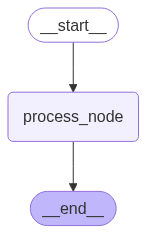

In [8]:
graph = StateGraph(state_schema=AgentState)

graph.add_node(node="process_node", action=process)
graph.set_entry_point(key="process_node")
graph.set_finish_point(key="process_node")

app = graph.compile()
app

In [9]:
user_input = "What is the capital of USA?"
app.invoke({"messages": [HumanMessage(content=user_input)]})

LLM Response: content='The capital of the United States is Washington, D.C.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 14, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BqkEHe4WnVlHsEyWEO4MIC3jUtULj', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--43c7b88f-9226-456a-992c-ab52017b8d57-0' usage_metadata={'input_tokens': 14, 'output_tokens': 12, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


{'messages': [HumanMessage(content='What is the capital of USA?', additional_kwargs={}, response_metadata={})]}

In [10]:
user_inpuit = input("What is your question? ")
app.invoke({"messages": [HumanMessage(content=user_inpuit)]})

LLM Response: content='Hello! How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BqkGdhrsQkZMkJ0SBrHv0rWM8WXVQ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--119146ff-0027-43a7-8935-7c70651ad4d5-0' usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={})]}

In [11]:
user_input = input("What is your question? ")
while user_input.lower() != "exit":
    app.invoke({"messages": [HumanMessage(content=user_input)]})
    user_input = input("What is your question? ")

LLM Response: content='Hello! How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BqkHFUZrcG2u0nTuNynv7X87A5XV2', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--1e12be10-2a6b-4322-93f9-9c92e8b5dc60-0' usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}
LLM Response: content="Thank you for asking! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?" additional_